<a href="https://colab.research.google.com/github/ljzier/ST-554-repo/blob/main/ST_554_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

This data has many categorical variables and a few numeric. You should add the following:

**Categorical variables**

• Create a stacked bar graph and a side-by-side bar graph. Give relevant x and y labels, and a title for
the plots.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in student data
stud_data = pd.read_csv("https://www4.stat.ncsu.edu/online/datasets/StudentData.txt", sep=";")
stud_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
# sex is first categorical data
stud_data["sexC"]=stud_data.sex.astype("category")
stud_data.sexC = stud_data.sexC.cat.rename_categories(["Female", "Male"])
#stud_data.sexC.value_counts()

# studytime is second categorical data
stud_data["studytimeC"]=stud_data.studytime.astype("category")
stud_data.studytimeC = stud_data.studytimeC.cat.rename_categories(["<2hrs", "2-5hrs", "5-10hrs", ">10hrs"])

# Ptatus is third categorical data
stud_data["PstatusC"]=stud_data.Pstatus.astype("category")
stud_data.PstatusC = stud_data.PstatusC.cat.rename_categories(["Together", "Apart"])
#stud_data.PstatusC.value_counts()



In [9]:
# creating a 2-way contingency table with sex and hours studying
stack_table = pd.crosstab(
    stud_data.sexC,
    stud_data.studytimeC,
    margins=True
)

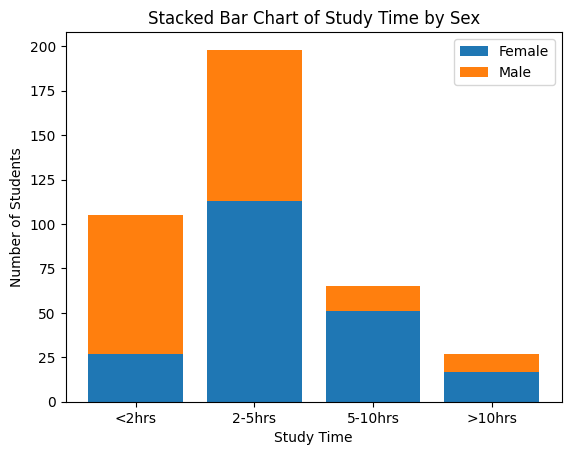

In [10]:
# creating a stacked bar chart
plt.bar(
  x = stud_data.studytimeC.cat.categories,
  height = stack_table.loc["Female", stud_data.studytimeC.cat.categories],
  label = "Female")
plt.bar(
  x = stud_data.studytimeC.cat.categories,
  height = stack_table.loc["Male", stud_data.studytimeC.cat.categories],
  bottom = stack_table.loc["Female", stud_data.studytimeC.cat.categories],
  label = "Male"
)
plt.xlabel("Study Time")
plt.ylabel("Number of Students")
plt.title("Stacked Bar Chart of Study Time by Sex")
plt.legend()
plt.show()

**What's interesting:**
This plot is interesting because it shows that maale students study less than female students. (or at least report that they study less).

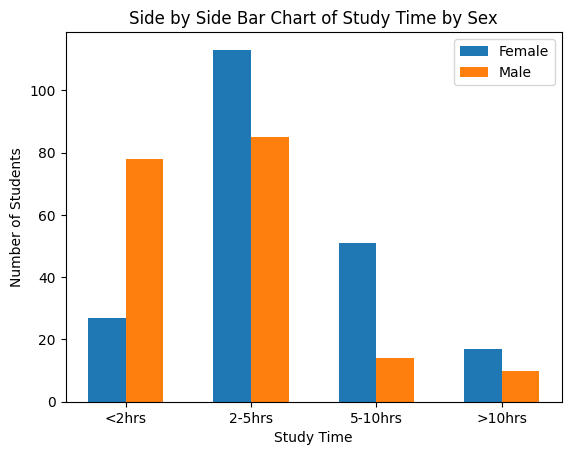

In [11]:
#creating a side by side bar chart

bar_width = 0.3
index = [1, 2, 3, 4]

plt.bar(
  x = [i - bar_width/2 for i in index], # Adjust x position for female bars
  height = stack_table.loc["Female", stud_data.studytimeC.cat.categories],
  width = bar_width,
  label = "Female")

plt.bar(
  x = [i + bar_width/2 for i in index], # Adjust x position for male bars
  height = stack_table.loc["Male", stud_data.studytimeC.cat.categories],
  width = bar_width,
  label = "Male")

plt.xlabel("Study Time")
plt.ylabel("Number of Students")
plt.title("Side by Side Bar Chart of Study Time by Sex")
plt.xticks(index, stud_data.studytimeC.cat.categories) # Set x-axis labels at the center of each group
plt.legend()
plt.show()

**What's interesting:**
This plot is interesting because it shows that male students study less than female students. (or at least report that they study less). It is much easier to interpret than the stacked chart in my opinion.


**Numeric variables (and across groups)**

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

• Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the
categorical variables (that is, create graphs that can compare the distributions across the groups). For
at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the
same plot. Add appropriate labels and titles.
a categorical variable in each. Add appropriate labels and titles.

**After each summary or graph, you should discuss what is interesting about it or what it tells
you!**


[Text(0.5, 0, 'Grade')]

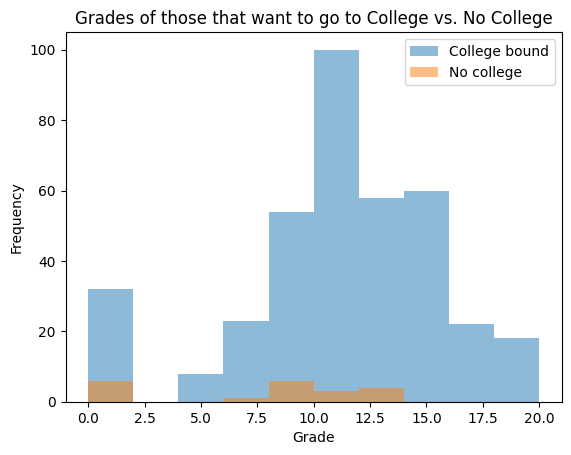

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##   Create a histogram for grades vs. college desire
# manually specify bins
bin_ends = 20
bins = [i*max(stud_data.G3)/bin_ends for i in range(0, bin_ends +1)]

# subsetting on those that want to go to college
grade_college = stud_data.loc[stud_data['higher'] =="yes", "G3"]
grade_nocollege = stud_data.loc[stud_data['higher'] =="no", "G3"]
#len(grade_college)
#len(grade_nocollege)

#correcting for numbers mismatch
grade_nocollege = pd.concat([grade_nocollege, pd.Series([np.nan for _ in range(355)])])
len(grade_college)
len(grade_nocollege)

# print(stud_data.address)
# zip together now that the same length
plotting_df = pd.DataFrame(zip(grade_college, grade_nocollege),
                      columns = ["College bound", "No college"])

# plotting
plotting_df.plot.hist(alpha = 0.5, title = "Grades of those that want to go to College vs. No College") \
    .set(xlabel = "Grade")

**What's interesting:**
It's not suprising that the students that don't want to go to college aren't at the top of the class.  It is interesting that a few with very low grades have college hopes.

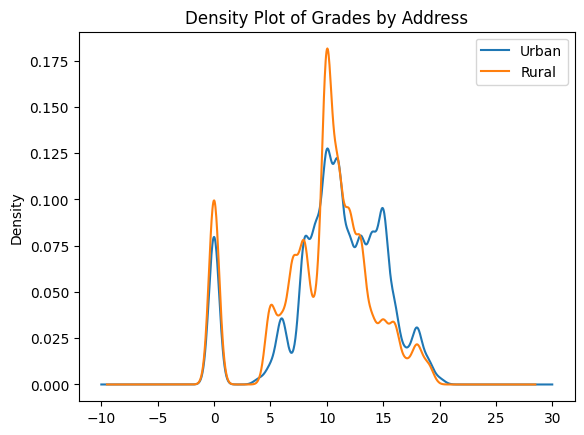

In [45]:
# creating kernel plots of grades vs. address (urban / rural)

grade_urban = stud_data.loc[stud_data['address'] == "U", 'G3']
grade_rural = stud_data.loc[stud_data['address'] == "R", 'G3']

grade_urban.plot.density(bw_method = 0.1, label = "Urban",
                                  title = "Density Plot of Grades by Address")
grade_rural.plot.density(bw_method = 0.1, label = "Rural")
plt.legend()
plt.show()

**What's Interesting:**
This plot shows that there isn't a huge discrepancy in grades between urban and rural students. That is not what I expected.

<Axes: title={'center': 'G3'}, xlabel='sex'>

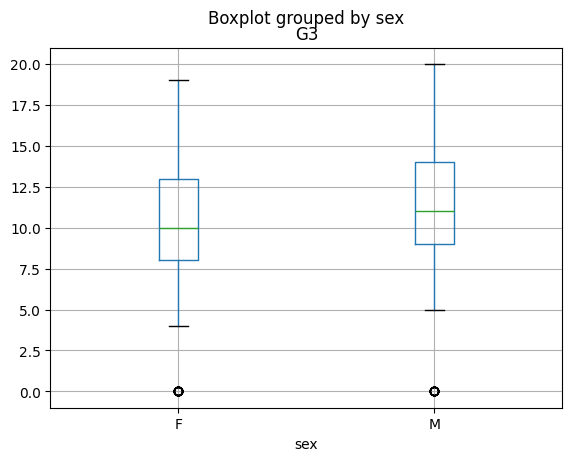

In [48]:
stud_data.boxplot(column = ["G3"], by = "sex")

Scatter plots:

• Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by a categorical variable in each. Add appropriate labels and titles.



<Axes: title={'center': 'Absences vs. Grade'}, xlabel='absences', ylabel='G3'>

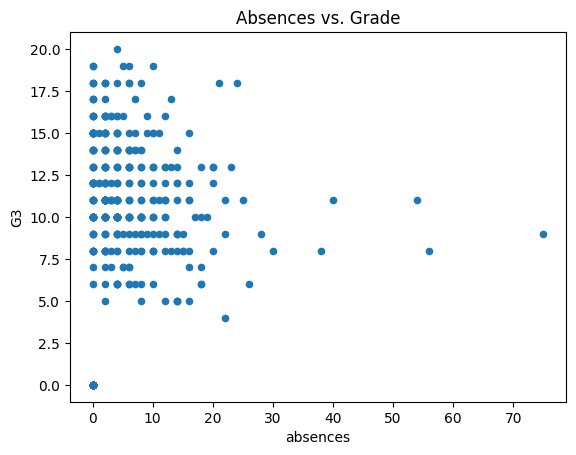

In [49]:
stud_data.plot.scatter(x = "absences", y = "G3", title = "Absences vs. Grade")

In [ ]:
# File → Download → Download .ipynb